# CHAPTER 3 - Functions, Vectors, Arrays, and Fourier Transforms

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift, fft, ifft, ifftshift
import numpy as np
import matplotlib.pyplot as plt

# Define the rect function
def rect(x):
    return np.where(np.abs(x) <= 0.5, 1, 0)

def comb(x):
    # Dirac delta approximation: 1 where x is an integer, 0 otherwise
    return np.where(np.abs(x - np.round(x)) < 3e-2, 1, 0)

def circ_(x, y, r):
    return np.where(np.sqrt(x**2 + y**2) <= r, 1, 0)

def sinc(x):
    return np.where(x == 0, 1, np.sin(x) / x)

def triangle(x):
    return np.where(np.abs(x) <= 1, 1 - np.abs(x), 0)

def gauss(x):
    return np.exp(-x**2)

def circ(r):
    return lambda x, y: np.where(np.sqrt(x**2 + y**2) <= r, 1, 0)



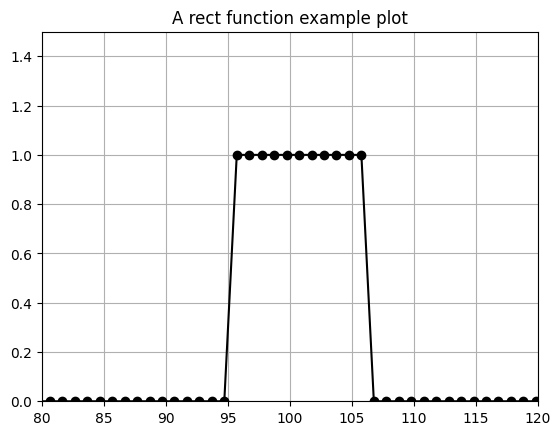

In [ ]:
w = 0.055 * 100
L = 2
M = 200
dx = L/M
x = (np.linspace(-L/2, L/2, M) + np.ones(M) / 2)* 100
f = rect(x/(2*w))
f = fftshift(f)
plt.plot(x, f, 'k-o')
plt.grid(True)
plt.title("A rect function example plot")
plt.xlim([80, 120])
plt.ylim([0, 1.5])
plt.show()


## 3.3 Shift for FFT

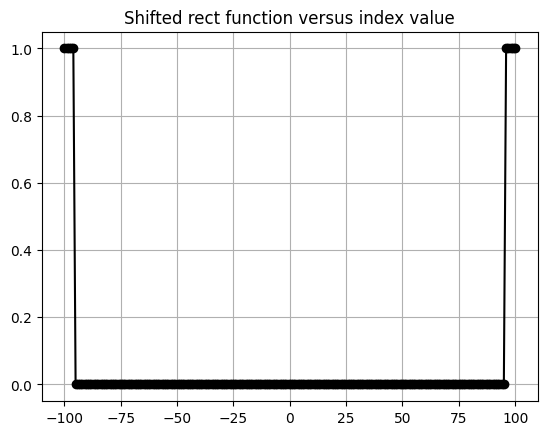

In [ ]:
x = (np.linspace(-L/2, L/2, M))* 100
f = rect(x/(2*w))
f0 = fftshift(f)

plt.plot(x, f0, 'k-o')
plt.grid(True)
plt.title("Shifted rect function versus index value")
plt.show()

## 3.4 Computing the FFT and Displaying Results

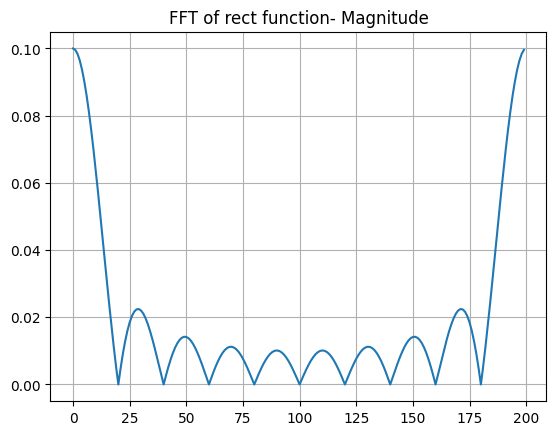

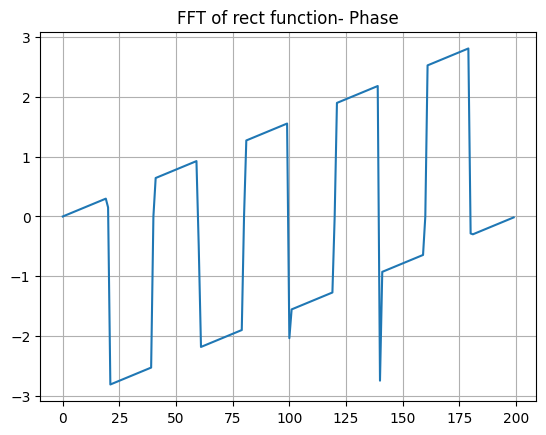

In [ ]:
from numpy.fft import fft, fftfreq, fftshift
F0 =fft(f0) * dx


plt.plot(np.abs(F0))
plt.grid(True)
plt.title("FFT of rect function- Magnitude")
plt.show()


## ERROR ## ## ERROR ## ## ERROR ## ## ERROR ##

plt.plot(np.angle(F0))
plt.grid(True)
plt.title("FFT of rect function- Phase")
plt.show()

## ERROR ## ## ERROR ## ## ERROR ## ## ERROR ##


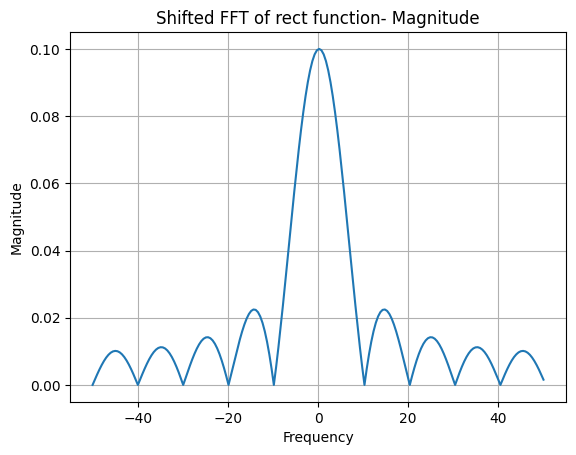

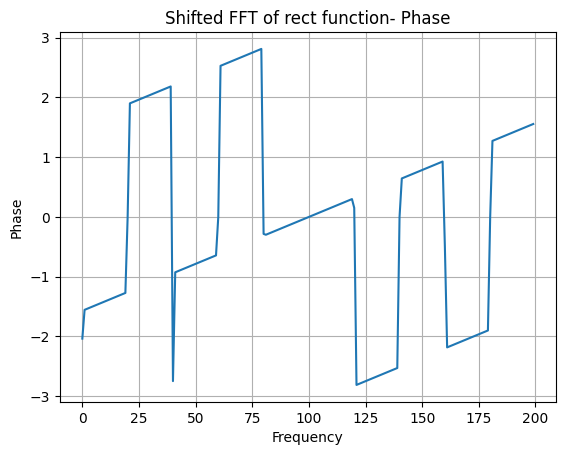

In [ ]:
F = fftshift(F0)
fx = np.linspace(-M/(2*L), M/(2*L), M)

plt.plot(fx, np.abs(F))
plt.grid(True)
plt.title("Shifted FFT of rect function- Magnitude")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

plt.plot(np.angle(F))
plt.grid(True)
plt.title("Shifted FFT of rect function- Phase")
plt.xlabel("Frequency")
plt.ylabel("Phase")
plt.show()

## 3.6 Comparison with Analytic Results


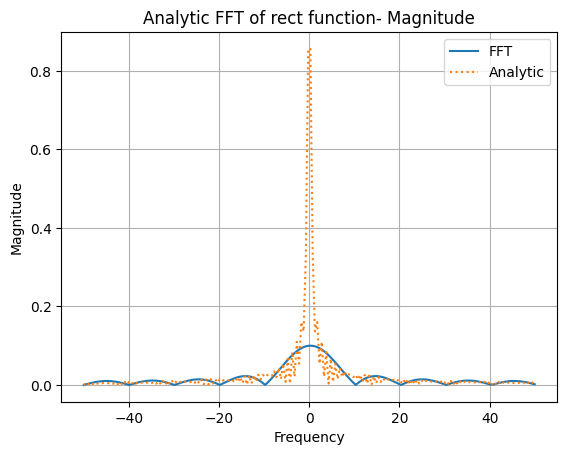

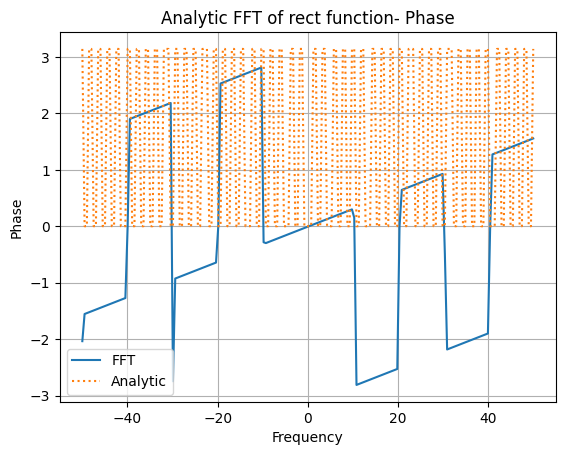

In [ ]:
F_an = 2*w*np.sinc(2*w*fx)
plt.plot(fx, np.abs(F),fx,np.abs(F_an),':' )
plt.grid(True)
plt.title("Analytic FFT of rect function- Magnitude")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.legend(['FFT', 'Analytic'])
plt.show()

plt.plot(fx, np.angle(F),fx,np.angle(F_an),':' )
plt.grid(True)
plt.title("Analytic FFT of rect function- Phase")
plt.xlabel("Frequency")
plt.ylabel("Phase")
plt.legend(['FFT', 'Analytic'])
plt.show()

## 3.7 Convolution Example
A convolution can be performed using the FFT and applying the Fourier
convolution theorem.

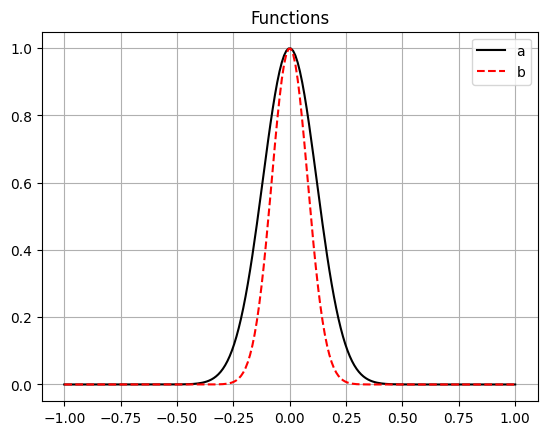

In [ ]:
wa = 0.3
wb = 0.2
L = 2
M = 200
dx = L/M

x = np.linspace(-L/2, L/2, M)
fa = np.exp(-np.pi * (x**2)/wa**2)
fb = np.exp(-np.pi * (x**2)/wb**2)

plt.plot(x, fa, '-k')
plt.plot(x, fb, '--r')
plt.grid(True)
plt.title("Functions")
plt.legend(['a', 'b'])
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


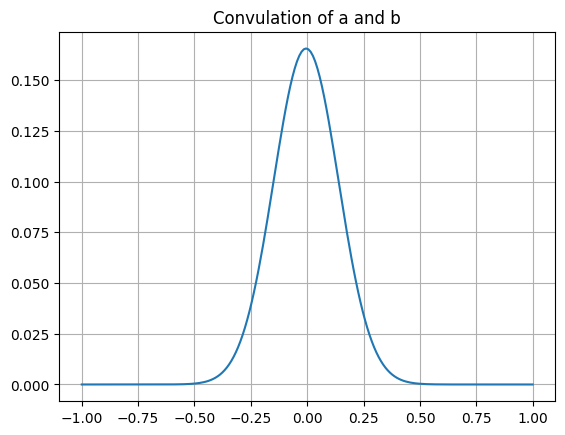

In [ ]:
Fa = fft(fa)
Fb = fft(fb)

F0 = Fa * Fb
f0 = ifft(F0) * dx
f0 = ifft(F0) * dx
f = fftshift(f0)

plt.plot(x,f)
plt.grid(True)
plt.title("Convulation of a and b")
plt.show()

## 3.7 Two Dimensions
Physical optics problems typically involve at least two spatial dimensions

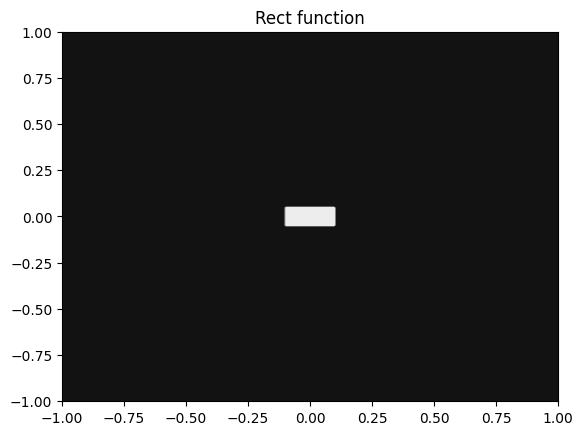

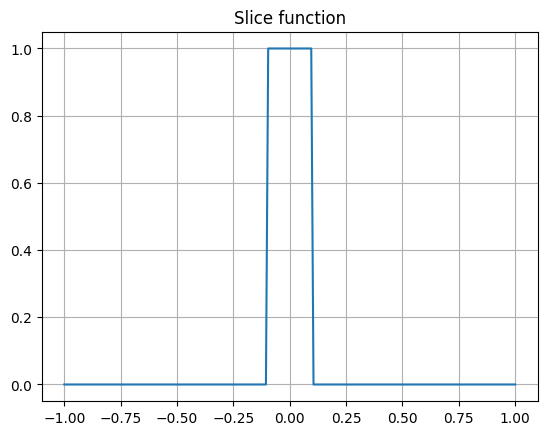

In [ ]:
wx = 0.1
wy = 0.05
L = 2
M = 200
dx = L/M

x = np.linspace(-L/2, L/2, M)
y = x
X, Y = np.meshgrid(x, y)
g = rect(X/(2*wx))* rect(Y/(2*wy))

plt.contourf(X, Y, g, cmap = "gray")
plt.title("Rect function")
plt.show()

plt.plot(x,g[int(M/2 + 1), :])
plt.grid(True)
plt.title("Slice function")
plt.show()

To perform a 2D FFT of the rectangle function, add the following:

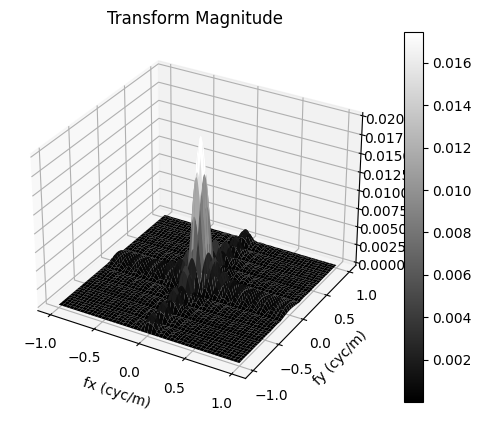

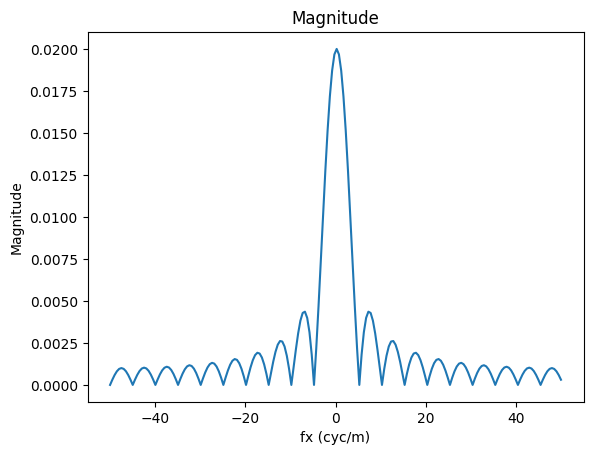

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
g0 = fftshift(g)
G0 = fft2(g0) * dx**2
G = fftshift(G0)
fx = np.linspace(-M/(2*L), M/(2*L), M)
fy = fx
FX, FY = np.meshgrid(fx, fy)


# Figure 3: Display transform magnitude (3D surface plot)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, np.abs(G), cmap='gray')

# Lighting effect in Python is achieved with color shading, not direct lighting like MATLAB
plt.xlabel('fx (cyc/m)')
plt.ylabel('fy (cyc/m)')
plt.title('Transform Magnitude')
plt.colorbar(surf)

# Figure 4: Plot fx slice profile (2D line plot)
plt.figure()
plt.plot(fx, np.abs(G[M//2, :]))
plt.title('Magnitude')
plt.xlabel('fx (cyc/m)')
plt.ylabel('Magnitude')

plt.show()


### P 3.1 Triangle function:
(a) Create a triangle function in an M-file. Try some lines like:
 T=1-abs(x);
 ask=abs(x)<=1;
 out=T.*mask;

(b) In a script, create a sampled triangle function using the following
specifications: triangle base half width = 0.1 m, vector length = 2 m,
and number of samples M = 200.

(c) Plot the sampled function.

(d) Compute the FFT.

(e) Find the analytic Fourier transform of the function in (b).

(f) Plot the FFT and analytic Fourier transform results together (both
magnitude and phase).

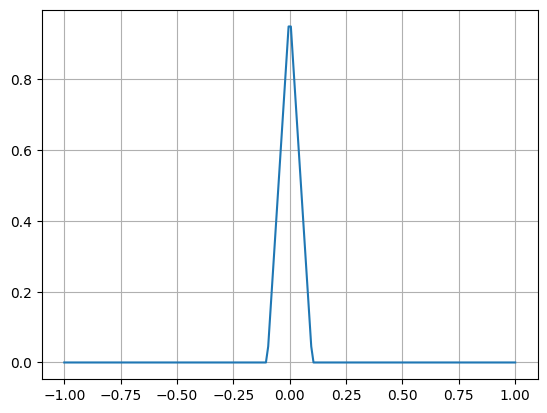

In [ ]:
# (a), (b) and (c)
import numpy as np
vector_length = 2
M = 200
base_half_width = 0.1

def triangle_function(x):
    T = 1 - np.abs(x)
    mask = np.abs(x) <= 1
    return T * mask

x = np.linspace(-vector_length/2, vector_length/2, M)
out = triangle_function(x / base_half_width)

# plot
import matplotlib.pyplot as plt
plt.plot(x, out)
plt.grid(True)
plt.show()


In [ ]:
# (d)
from numpy.fft import fft, fftfreq
fft_values = np.fft.fft(out)
frequencies = np.fft.fftfreq(M)

In [ ]:
# (e)
def analytic_fourier_transform(f):
    base_width = 2 * base_half_width
    return (2 / (np.pi**2 * base_width**2)) * (1 - np.cos(np.pi * f * base_width)) / (f**2)

analytic_fft_values = analytic_fourier_transform(frequencies)


<ipython-input-13-a35f4776e842>:4: RuntimeWarning: invalid value encountered in divide
  return (2 / (np.pi**2 * base_width**2)) * (1 - np.cos(np.pi * f * base_width)) / (f**2)


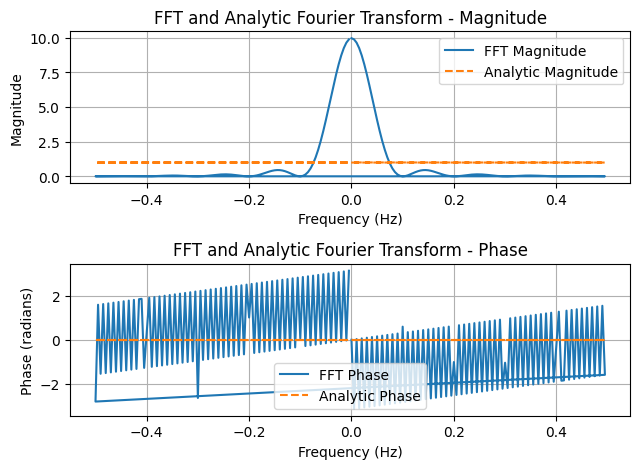

In [ ]:
# (f)
plt.figure()

# FFT magnitude
plt.subplot(2, 1, 1)
plt.plot(frequencies, np.abs(fft_values), label="FFT Magnitude")
plt.plot(frequencies, np.abs(analytic_fft_values), label="Analytic Magnitude", linestyle="--")
plt.title("FFT and Analytic Fourier Transform - Magnitude")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True)

# FFT phase
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.angle(fft_values), label="FFT Phase")
plt.plot(frequencies, np.angle(analytic_fft_values), label="Analytic Phase", linestyle="--")
plt.title("FFT and Analytic Fourier Transform - Phase")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (radians)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### P 3.2
Code the example for the convolution of the Gaussian functions presented in
Section 3.6. Find the analytic convolution of these functions and compare
this result with the discrete result in a plot.

----------------------------------------------------------------------------

$$
(f_a * f_b)(x) = \int_{-\infty}^{\infty} \exp\left(-\frac{\pi x'^2}{w_a^2}\right) \exp\left(-\frac{\pi (x - x')^2}{w_b^2}\right) \, dx'
$$

Expanding the second exponential term:

$$
(f_a * f_b)(x) = \int_{-\infty}^{\infty} \exp\left(-\frac{\pi x'^2}{w_a^2} - \frac{\pi (x^2 - 2xx' + x'^2)}{w_b^2}\right) \, dx'
$$

Simplifying:

$$
(f_a * f_b)(x) = \int_{-\infty}^{\infty} \exp\left(-\pi \left( x'^2 \left(\frac{1}{w_a^2} + \frac{1}{w_b^2}\right) + \frac{x^2}{w_b^2} - \frac{2xx'}{w_b^2} \right)\right) \, dx'
$$

Completing the square:

$$
(f_a * f_b)(x) = \exp\left(-\frac{\pi x^2}{\left(w_a^2 + w_b^2\right)}\right) \int_{-\infty}^{\infty} \exp\left(-\pi A \left(x' - \frac{B}{A}\right)^2\right) \, dx'
$$

where:

$$
A = \frac{1}{w_a^2} + \frac{1}{w_b^2}, \quad B = \frac{x}{w_b^2}.
$$

The integral is a Gaussian integral, and its result is:

$$
(f_a * f_b)(x) = \sqrt{\frac{w_a^2 w_b^2}{w_a^2 + w_b^2}} \exp\left(-\frac{\pi x^2}{w_a^2 + w_b^2}\right)
$$

----------------------------------------------------------------------------


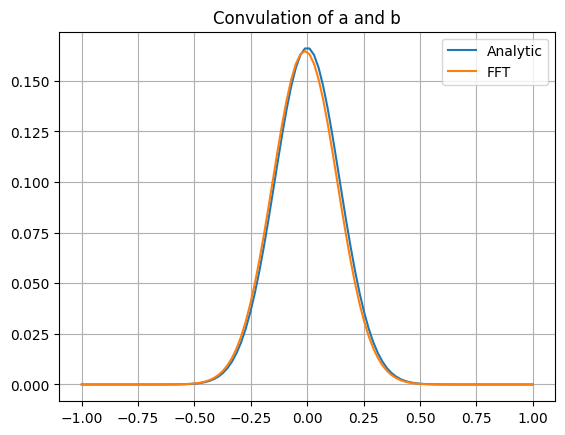

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftshift, fftfreq, fft2, ifft2
wa = 0.3
wb = 0.2
L = 2
M = 100
dx = L/M

x = np.linspace(-L/2, L/2, M)
fa = np.exp(-np.pi * (x**2)/wa**2)
fb = np.exp(-np.pi * (x**2)/wb**2)
wa = 0.3
wb = 0.2
# Write this function : (f_a * f_b)(x) = \sqrt{\frac{w_a^2 w_b^2}{w_a^2 + w_b^2}} \exp\left(-\frac{\pi x^2}{w_a^2 + w_b^2}\right)
fa_conv_fb = lambda x: np.sqrt(wa**2 * wb**2 / (wa**2 + wb**2)) * np.exp(-np.pi * x**2 / (wa**2 + wb**2))

y = fa_conv_fb(x)

plt.plot(x, y)

Fa = fft(fa)
Fb = fft(fb)

F0 = Fa * Fb
f0 = ifft(F0) * dx
f0 = ifft(F0) * dx
f = fftshift(f0)

plt.plot(x,f)
plt.grid(True)
plt.title("Convulation of a and b")
plt.legend(['Analytic', 'FFT'])
plt.show()

### 3.3 Circle function M-file:
(a) Create a circle function in an M-file.

(b) Generate a sampled circle function in a 2D array with the following
parameters: circle radius = 0.015 m, array side length = 0.2 m, and
number of samples (one dimension) M = 200.

(c) Display the sampled function as an image.

(d) Take the FFT of the array and display the magnitude of the transform
in surface and profile plots.

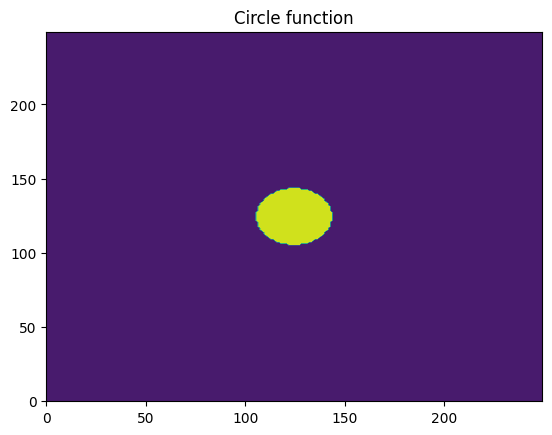

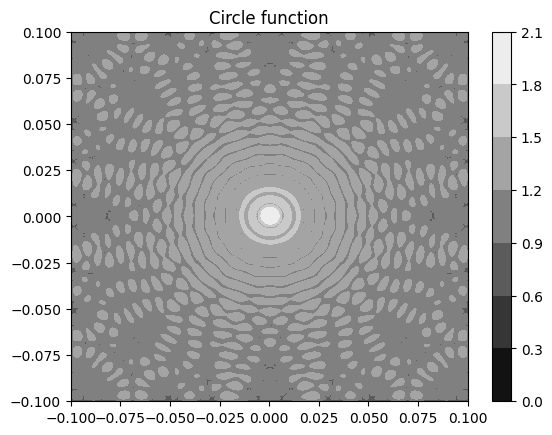

In [ ]:
def circ(r):
    return lambda x, y: np.where(np.sqrt(x**2 + y**2) <= r, 1, 0)

r = 0.015
L = 0.2
M = 250

# Visualization of the 1D functions
x = np.linspace(-L/2, L/2, M)
y = x
X, Y = np.meshgrid(x, y)
r = 0.015
circ_plot = circ(r)(X, Y)

plt.contourf(circ_plot)
plt.title("Circle function")
plt.show()

alpha = 0.1
FT2 = fft2(circ_plot)
FT2_shifted = fftshift(FT2)  # To center the zero-frequency component
Z = np.abs(FT2_shifted)**alpha

plt.contourf(X, Y, Z, cmap= 'gray')
plt.title("Circle function")
plt.colorbar()
plt.show()




In [ ]:
# This is just a fun animation. Not an important thing.
'''
from matplotlib.animation import FuncAnimation

# Create figure and axis for animation
fig, ax = plt.subplots()
contour = None  # Placeholder for the contour plot
colorbar = None  # Placeholder for the colorbar

# Update function for each frame of the animation
def update(alpha):
    global contour, colorbar
    if contour:
        for coll in contour.collections:
            coll.remove()  # Remove the previous contour plot
    FT2 = fft2(circ_plot)
    contour = ax.contourf(X,
                          Y,
                          np.abs(FT2)**alpha, cmap="viridis")

    ax.set_title(f"Game of Diffraction")

    # Create colorbar only once
    if colorbar is None:
        colorbar = plt.colorbar(contour, ax=ax)

# Animation function: change alpha from 0.1 to 0.5
alpha_values = np.arange(0.2, 0.3, 0.0002)
ani = FuncAnimation(fig, update, frames=alpha_values, interval=100)

# Display the animation
plt.show()

# Save the animation as a GIF (if you want)
ani.save('circle_function_animation2.gif', writer='imagemagick', fps=30)'''

'\nfrom matplotlib.animation import FuncAnimation\n\n# Create figure and axis for animation\nfig, ax = plt.subplots()\ncontour = None  # Placeholder for the contour plot\ncolorbar = None  # Placeholder for the colorbar\n\n# Update function for each frame of the animation\ndef update(alpha):\n    global contour, colorbar\n    if contour:\n        for coll in contour.collections:\n            coll.remove()  # Remove the previous contour plot\n    FT2 = fft2(circ_plot)\n    contour = ax.contourf(X,\n                          Y,\n                          np.abs(FT2)**alpha, cmap="viridis")\n\n    ax.set_title(f"Game of Diffraction")\n\n    # Create colorbar only once\n    if colorbar is None:\n        colorbar = plt.colorbar(contour, ax=ax)\n\n# Animation function: change alpha from 0.1 to 0.5\nalpha_values = np.arange(0.2, 0.3, 0.0002)\nani = FuncAnimation(fig, update, frames=alpha_values, interval=100)\n\n# Display the animation\nplt.show()\n\n# Save the animation as a GIF (if you want)